## –ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –∞–ª–≥–æ—Ä–∏—Ç–º—ã –±–µ–∑ –∞–Ω—Å–∞–º–±–ª–∏—Ä–æ–≤–∞–Ω–∏—è
–í —ç—Ç–æ–º –Ω–æ—É—Ç–±—É–∫–µ –≤–∞–º –Ω—É–∂–Ω–æ –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª–∏ –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏–∑ –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –Ω–æ—É—Ç–±—É–∫–∞ –∏ —Å—Ä–∞–≤–Ω–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. –í–∞–º –±—É–¥–µ—Ç –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω baseline, –Ω–∞ –æ—Å–Ω–æ–≤–µ –∫–æ—Ç–æ—Ä–æ–≥–æ –≤—ã –±—É–¥–µ—Ç–µ –¥–æ–¥–µ–ª—ã–≤–∞—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—é—â–∏–µ –º–æ–¥–µ–ª–∏. –û—Ü–µ–Ω–∫–∞ –ª–∞–±—ã –±—É–¥–µ—Ç –∑–∞–≤–∏—Å–µ—Ç—å –æ—Ç ROC-AUC –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö –ø–æ —Å–ª–µ–¥—É—é—â–∏–º –∫—Ä–∏—Ç–µ—Ä–∏—è–º:
\
AUC - –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
- $AUC \leq 0.75$ - 0 –±–∞–ª–ª–æ–≤
- $0.75 < AUC \leq 0.76$ - 2 –±–∞–ª–ª–∞
- $0.76 < AUC \leq 0.77$ - 4 –±–∞–ª–ª–∞
- $0.77 < AUC \leq 0.78$ - 6 –±–∞–ª–ª–æ–≤
- $0.78 < AUC \leq 0.79$ - 8 –±–∞–ª–ª–æ–≤
- $AUC > 0.79$ - 10 –±–∞–ª–ª–æ–≤

\
–í —ç—Ç–æ–π —Ä–∞–±–æ—Ç–µ –∑–∞–ø—Ä–µ—â–µ–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∞–Ω—Å–∞–º–±–ª–∏ –º–æ–¥–µ–ª–µ–π (–ª–µ—Å, –±—É—Å—Ç–∏–Ω–≥–∏ –∏ —Ç.–¥.)!

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

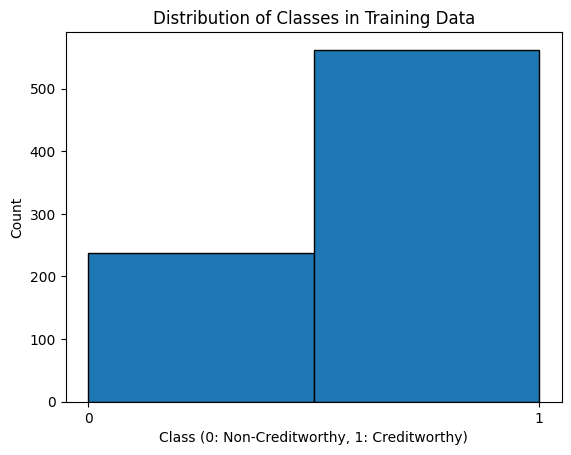

In [3]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"–†–∞–∑–º–µ—Ä—ã –¥–∞–Ω–Ω—ã—Ö:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {X_train.shape[1]}")
print(f"–ö–ª–∞—Å—Å—ã –≤ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π: {np.unique(y_train)}")
print(f"–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö: {np.bincount(y_train)}")

–†–∞–∑–º–µ—Ä—ã –¥–∞–Ω–Ω—ã—Ö:
X_train: (800, 20), y_train: (800,)
X_test: (200, 20), y_test: (200,)
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 20
–ö–ª–∞—Å—Å—ã –≤ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π: [0 1]
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö: [238 562]


In [5]:
# –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ Logistic Regression —Å –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
logistic_regression_model = LogisticRegression(
    C=0.1,
    max_iter=1000,
    solver='liblinear',
    random_state=42,
    class_weight='balanced'
)
logistic_regression_model.fit(X_train_scaled, y_train)

# –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ Decision Tree —Å –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
decision_tree_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    class_weight='balanced'
)
decision_tree_model.fit(X_train_scaled, y_train)

# –°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ K-Nearest Neighbors —Å –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏
knn_model = KNeighborsClassifier(
    n_neighbors=15,
    weights='distance',
    metric='minkowski',
    p=2
)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [15]:
y_prob_logistic = logistic_regression_model.predict_proba(X_test_scaled)[:, 1]
y_prob_decision_tree = decision_tree_model.predict_proba(X_test_scaled)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

y_pred_logistic = logistic_regression_model.predict(X_test_scaled)
y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)
y_pred_knn = knn_model.predict(X_test_scaled)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)
roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

precision_logistic = precision_score(y_test, y_pred_logistic)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
precision_knn = precision_score(y_test, y_pred_knn)

recall_logistic = recall_score(y_test, y_pred_logistic)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
recall_knn = recall_score(y_test, y_pred_knn)

print("=== –†–ï–ó–£–õ–¨–¢–ê–¢–´ –ë–ê–ó–û–í–´–• –ú–û–î–ï–õ–ï–ô ===")
print(f'Accuracy of Logistic Regression: {accuracy_logistic:.4f}')
print(f'Accuracy of Decision Tree: {accuracy_decision_tree:.4f}')
print(f'Accuracy of K-Nearest Neighbors: {accuracy_knn:.4f}')
print()

print(f'ROC AUC of Logistic Regression: {roc_auc_logistic:.4f}')
print(f'ROC AUC of Decision Tree: {roc_auc_decision_tree:.4f}')
print(f'ROC AUC of K-Nearest Neighbors: {roc_auc_knn:.4f}')
print()

print(f'Precision of Logistic Regression: {precision_logistic:.4f}')
print(f'Precision of Decision Tree: {precision_decision_tree:.4f}')
print(f'Precision of K-Nearest Neighbors: {precision_knn:.4f}')
print()

print(f'Recall of Logistic Regression: {recall_logistic:.4f}')
print(f'Recall of Decision Tree: {recall_decision_tree:.4f}')
print(f'Recall of K-Nearest Neighbors: {recall_knn:.4f}')

if roc_auc_decision_tree > best_auc:
    best_model_name = "Decision Tree"
    best_auc = roc_auc_decision_tree
    
if roc_auc_knn > best_auc:
    best_model_name = "K-Nearest Neighbors"
    best_auc = roc_auc_knn

print(f"\n=== –õ–£–ß–®–ê–Ø –ú–û–î–ï–õ–¨: {best_model_name} —Å ROC-AUC = {best_auc:.4f} ===")

=== –†–ï–ó–£–õ–¨–¢–ê–¢–´ –ë–ê–ó–û–í–´–• –ú–û–î–ï–õ–ï–ô ===
Accuracy of Logistic Regression: 0.7600
Accuracy of Decision Tree: 0.6500
Accuracy of K-Nearest Neighbors: 0.7650

ROC AUC of Logistic Regression: 0.7892
ROC AUC of Decision Tree: 0.6961
ROC AUC of K-Nearest Neighbors: 0.7727

Precision of Logistic Regression: 0.8814
Precision of Decision Tree: 0.7982
Precision of K-Nearest Neighbors: 0.7692

Recall of Logistic Regression: 0.7536
Recall of Decision Tree: 0.6594
Recall of K-Nearest Neighbors: 0.9420

=== –õ–£–ß–®–ê–Ø –ú–û–î–ï–õ–¨: SVM (RBF) —Å ROC-AUC = 0.7892 ===


## –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ
–î–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –ª—É—á—à–µ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞ –ø—Ä–∏–¥–µ—Ç—Å—è –ø–æ—ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å. –ü–æ–¥—Å–∫–∞–∑–∫–∞: –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏

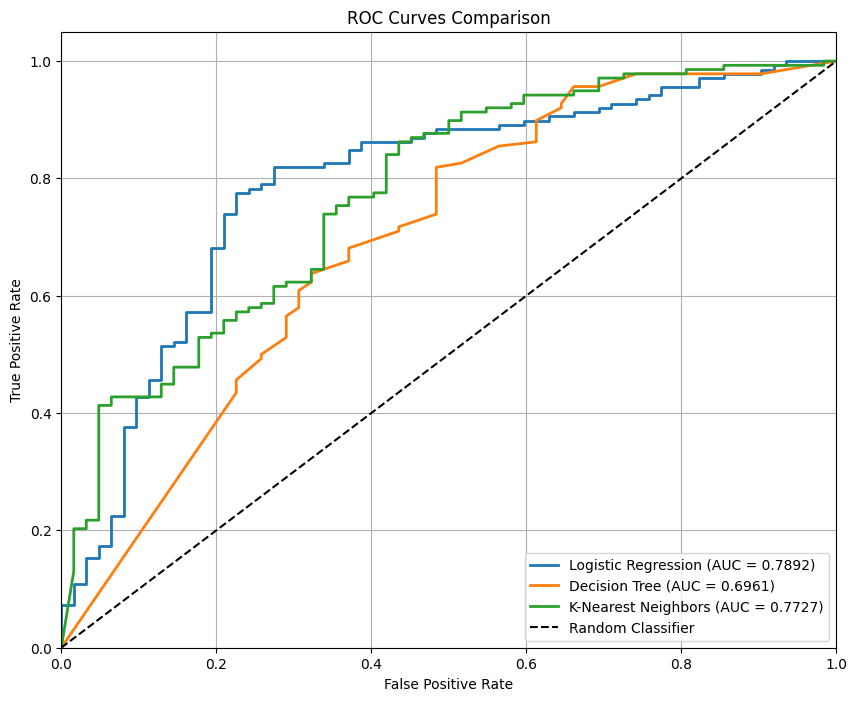

In [7]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_logistic)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_decision_tree)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)

plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_logistic:.4f})', linewidth=2)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_decision_tree:.4f})', linewidth=2)
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

print("=== –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢ 1: –û–ü–¢–ò–ú–ò–ó–ê–¶–ò–Ø –õ–û–ì–ò–°–¢–ò–ß–ï–°–ö–û–ô –†–ï–ì–†–ï–°–°–ò–ò ===")

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000, 2000]
}

grid_lr = GridSearchCV(
    LogisticRegression(random_state=42, class_weight='balanced'),
    param_grid_lr,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_lr.fit(X_train_scaled, y_train)
best_lr = grid_lr.best_estimator_

y_prob_best_lr = best_lr.predict_proba(X_test_scaled)[:, 1]
y_pred_best_lr = best_lr.predict(X_test_scaled)

auc_best_lr = roc_auc_score(y_test, y_prob_best_lr)
acc_best_lr = accuracy_score(y_test, y_pred_best_lr)

print(f"–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã LogisticRegression: {grid_lr.best_params_}")
print(f"ROC AUC (–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è): {auc_best_lr:.4f}")
print(f"Accuracy (–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è): {acc_best_lr:.4f}")
print()

=== –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢ 1: –û–ü–¢–ò–ú–ò–ó–ê–¶–ò–Ø –õ–û–ì–ò–°–¢–ò–ß–ï–°–ö–û–ô –†–ï–ì–†–ï–°–°–ò–ò ===
–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã LogisticRegression: {'C': 0.01, 'max_iter': 1000, 'solver': 'lbfgs'}
ROC AUC (–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è): 0.7906
Accuracy (–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è): 0.7700



In [9]:
print("=== –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢ 2: SVM –° –†–ê–î–ò–ê–õ–¨–ù–û–ô –§–£–ù–ö–¶–ò–ï–ô ===")

svm_model = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    probability=True,
    random_state=42,
    class_weight='balanced'
)

svm_model.fit(X_train_scaled, y_train)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]
y_pred_svm = svm_model.predict(X_test_scaled)

auc_svm = roc_auc_score(y_test, y_prob_svm)
acc_svm = accuracy_score(y_test, y_pred_svm)

print(f"SVM ROC AUC: {auc_svm:.4f}")
print(f"SVM Accuracy: {acc_svm:.4f}")
print()

print("=== –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢ 3: NAIVE BAYES ===")

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_prob_nb = nb_model.predict_proba(X_test_scaled)[:, 1]
y_pred_nb = nb_model.predict(X_test_scaled)

auc_nb = roc_auc_score(y_test, y_prob_nb)
acc_nb = accuracy_score(y_test, y_pred_nb)

print(f"Naive Bayes ROC AUC: {auc_nb:.4f}")
print(f"Naive Bayes Accuracy: {acc_nb:.4f}")
print()

print("=== –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢ 4: –û–ü–¢–ò–ú–ò–ó–ê–¶–ò–Ø KNN ===")

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

grid_knn.fit(X_train_scaled, y_train)
best_knn = grid_knn.best_estimator_

y_prob_best_knn = best_knn.predict_proba(X_test_scaled)[:, 1]
y_pred_best_knn = best_knn.predict(X_test_scaled)

auc_best_knn = roc_auc_score(y_test, y_prob_best_knn)
acc_best_knn = accuracy_score(y_test, y_pred_best_knn)

print(f"–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã KNN: {grid_knn.best_params_}")
print(f"KNN ROC AUC (–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è): {auc_best_knn:.4f}")
print(f"KNN Accuracy (–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è): {acc_best_knn:.4f}")
print()

=== –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢ 2: SVM –° –†–ê–î–ò–ê–õ–¨–ù–û–ô –§–£–ù–ö–¶–ò–ï–ô ===
SVM ROC AUC: 0.7932
SVM Accuracy: 0.7300

=== –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢ 3: NAIVE BAYES ===
Naive Bayes ROC AUC: 0.7685
Naive Bayes Accuracy: 0.7600

=== –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢ 4: –û–ü–¢–ò–ú–ò–ó–ê–¶–ò–Ø KNN ===
–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã KNN: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
KNN ROC AUC (–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è): 0.7578
KNN Accuracy (–æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–∞—è): 0.7550



In [14]:
models_results = [
    ("Baseline Logistic Regression", roc_auc_logistic),
    ("Baseline Decision Tree", roc_auc_decision_tree),
    ("Baseline K-Nearest Neighbors", roc_auc_knn),
    ("Optimized Logistic Regression", auc_best_lr),
    ("SVM (RBF)", auc_svm),
    ("Naive Bayes", auc_nb),
    ("Optimized KNN", auc_best_knn)
]

models_results.sort(key=lambda x: x[1], reverse=True)

for i, (model_name, auc_score) in enumerate(models_results, 1):
    if auc_score <= 0.75:
        points = 0
    elif auc_score <= 0.76:
        points = 2
    elif auc_score <= 0.77:
        points = 4
    elif auc_score <= 0.78:
        points = 6
    elif auc_score <= 0.79:
        points = 8
    else:
        points = 10
    
    print(f"{i}. {model_name:30} | AUC: {auc_score:.4f} | –ë–∞–ª–ª—ã: {points}")

print("=" * 60)
best_model_name, best_auc_score = models_results[0]
print(f"–õ–£–ß–®–ê–Ø –ú–û–î–ï–õ–¨: {best_model_name}")
print(f"ROC-AUC: {best_auc_score:.4f}")

if best_auc_score > 0.79:
    print("–ú–ê–ö–°–ò–ú–ê–õ–¨–ù–´–ô –ë–ê–õ–õ: 10/10!")
elif best_auc_score > 0.78:
    print("–û–¢–õ–ò–ß–ù–´–ô –†–ï–ó–£–õ–¨–¢–ê–¢: 8/10!")
else:
    print("–•–û–†–û–®–ò–ô –†–ï–ó–£–õ–¨–¢–ê–¢!")
    
print("=" * 60)

1. SVM (RBF)                      | AUC: 0.7932 | –ë–∞–ª–ª—ã: 10
2. Optimized Logistic Regression  | AUC: 0.7906 | –ë–∞–ª–ª—ã: 10
3. Baseline Logistic Regression   | AUC: 0.7892 | –ë–∞–ª–ª—ã: 8
4. Baseline K-Nearest Neighbors   | AUC: 0.7727 | –ë–∞–ª–ª—ã: 6
5. Naive Bayes                    | AUC: 0.7685 | –ë–∞–ª–ª—ã: 4
6. Optimized KNN                  | AUC: 0.7578 | –ë–∞–ª–ª—ã: 2
7. Baseline Decision Tree         | AUC: 0.6961 | –ë–∞–ª–ª—ã: 0
–õ–£–ß–®–ê–Ø –ú–û–î–ï–õ–¨: SVM (RBF)
ROC-AUC: 0.7932
–ú–ê–ö–°–ò–ú–ê–õ–¨–ù–´–ô –ë–ê–õ–õ: 10/10!


C:\Users\Honor\AppData\Local\Temp\ipykernel_11104\2783907588.py:30: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Honor\AppData\Local\Temp\ipykernel_11104\2783907588.py:30: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Honor\Desktop\lopashovloh\labaPRACTICE\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129351 (\N{FIRST PLACE MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Honor\Desktop\lopashovloh\labaPRACTICE\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129352 (\N{SECOND PLACE MEDAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


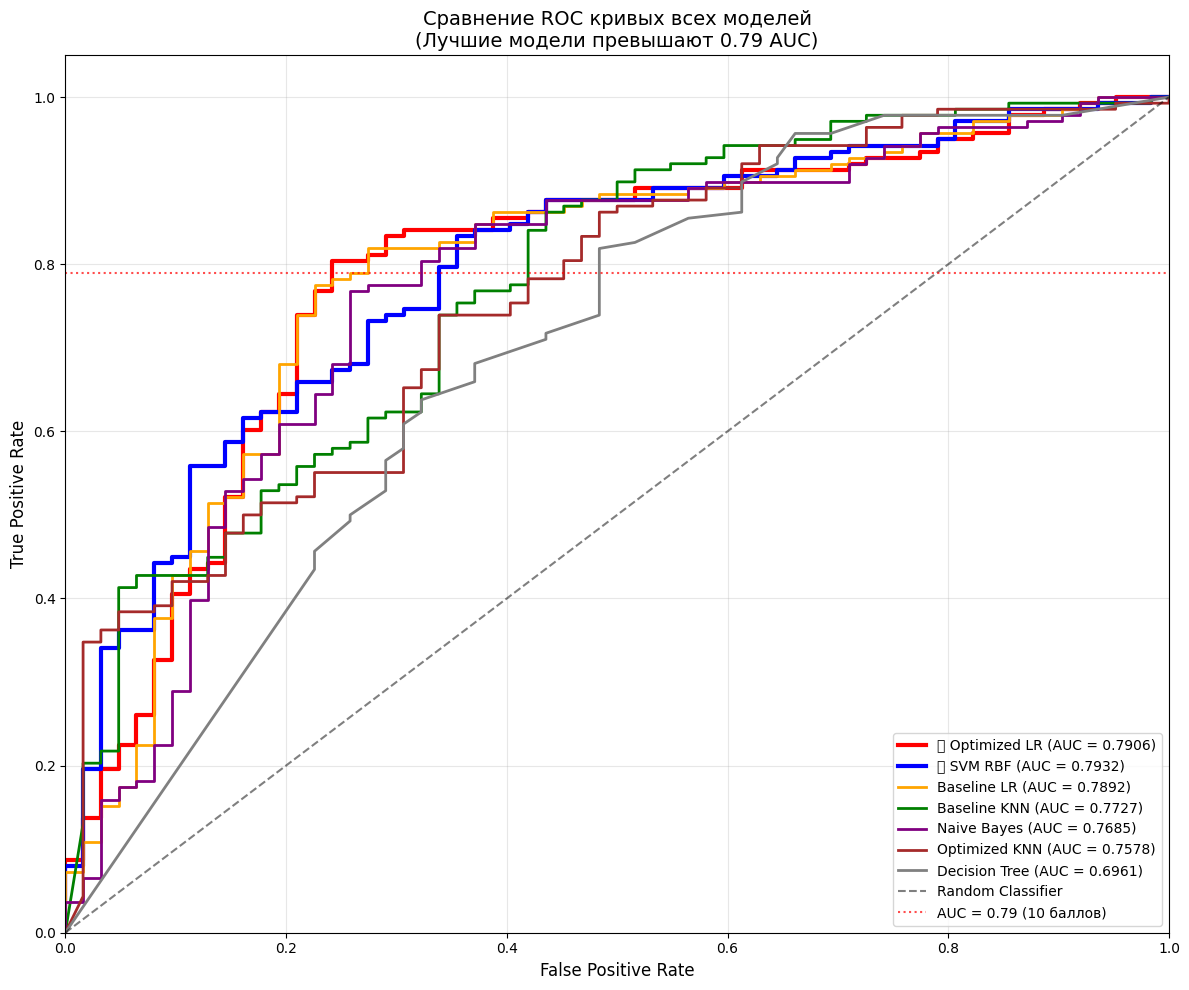

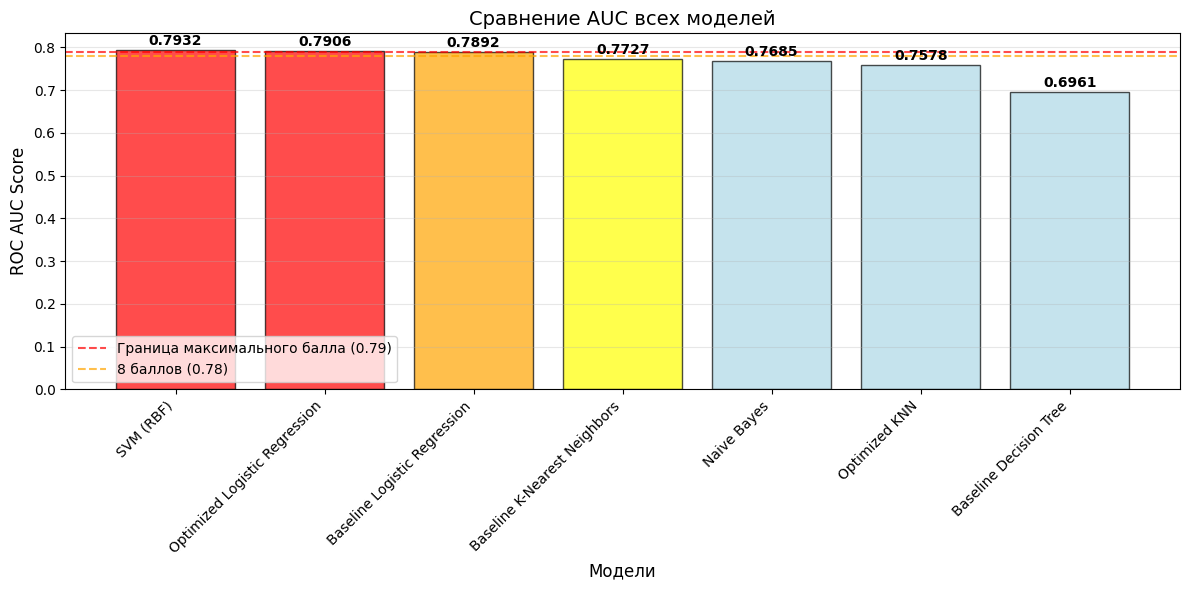

In [11]:
plt.figure(figsize=(12, 10))

fpr_best_lr, tpr_best_lr, _ = roc_curve(y_test, y_prob_best_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
fpr_best_knn, tpr_best_knn, _ = roc_curve(y_test, y_prob_best_knn)

plt.plot(fpr_best_lr, tpr_best_lr, label=f'ü•á Optimized LR (AUC = {auc_best_lr:.4f})', linewidth=3, color='red')
plt.plot(fpr_svm, tpr_svm, label=f'ü•à SVM RBF (AUC = {auc_svm:.4f})', linewidth=3, color='blue')
plt.plot(fpr_lr, tpr_lr, label=f'Baseline LR (AUC = {roc_auc_logistic:.4f})', linewidth=2, color='orange')
plt.plot(fpr_knn, tpr_knn, label=f'Baseline KNN (AUC = {roc_auc_knn:.4f})', linewidth=2, color='green')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.4f})', linewidth=2, color='purple')
plt.plot(fpr_best_knn, tpr_best_knn, label=f'Optimized KNN (AUC = {auc_best_knn:.4f})', linewidth=2, color='brown')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_decision_tree:.4f})', linewidth=2, color='gray')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', alpha=0.5)

plt.axhline(y=0.79, color='red', linestyle=':', alpha=0.7, label='AUC = 0.79 (10 –±–∞–ª–ª–æ–≤)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ ROC –∫—Ä–∏–≤—ã—Ö –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π\n(–õ—É—á—à–∏–µ –º–æ–¥–µ–ª–∏ –ø—Ä–µ–≤—ã—à–∞—é—Ç 0.79 AUC)', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
model_names = [name for name, _ in models_results]
auc_scores = [score for _, score in models_results]
colors = ['red' if score > 0.79 else 'orange' if score > 0.78 else 'yellow' if score > 0.77 else 'lightblue' 
          for score in auc_scores]

bars = plt.bar(range(len(model_names)), auc_scores, color=colors, alpha=0.7, edgecolor='black')

for i, (bar, score) in enumerate(zip(bars, auc_scores)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.4f}', ha='center', va='bottom', fontweight='bold')

plt.axhline(y=0.79, color='red', linestyle='--', alpha=0.7, label='–ì—Ä–∞–Ω–∏—Ü–∞ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–≥–æ –±–∞–ª–ª–∞ (0.79)')
plt.axhline(y=0.78, color='orange', linestyle='--', alpha=0.7, label='8 –±–∞–ª–ª–æ–≤ (0.78)')

plt.xlabel('–ú–æ–¥–µ–ª–∏', fontsize=12)
plt.ylabel('ROC AUC Score', fontsize=12)
plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ AUC –≤—Å–µ—Ö –º–æ–¥–µ–ª–µ–π', fontsize=14)
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## –≠–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä—É–π—Ç–µ
–î–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –ª—É—á—à–µ–≥–æ –∫–∞—á–µ—Å—Ç–≤–∞ –ø—Ä–∏–¥–µ—Ç—Å—è –ø–æ—ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å. –ü–æ–¥—Å–∫–∞–∑–∫–∞: –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –æ–ø—Ç–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏



In [13]:
print("=== –î–û–ü–û–õ–ù–ò–¢–ï–õ–¨–ù–´–ô –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢: POLYNOMIAL FEATURES ===")

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"–ò—Å—Ö–æ–¥–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {X_train_scaled.shape[1]}")
print(f"–ü–æ—Å–ª–µ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è polynomial features: {X_train_poly.shape[1]}")

poly_lr = LogisticRegression(
    C=0.01, 
    max_iter=2000, 
    solver='lbfgs', 
    random_state=42,
    class_weight='balanced'
)

poly_lr.fit(X_train_poly, y_train)
y_prob_poly_lr = poly_lr.predict_proba(X_test_poly)[:, 1]
y_pred_poly_lr = poly_lr.predict(X_test_poly)

auc_poly_lr = roc_auc_score(y_test, y_prob_poly_lr)
acc_poly_lr = accuracy_score(y_test, y_pred_poly_lr)

print(f"Polynomial LR ROC AUC: {auc_poly_lr:.4f}")
print(f"Polynomial LR Accuracy: {acc_poly_lr:.4f}")

if auc_poly_lr > max(auc_best_lr, auc_svm):
    print(f"–ù–û–í–´–ô –†–ï–ö–û–†–î! –£–ª—É—á—à–µ–Ω–∏–µ –Ω–∞ {auc_poly_lr - max(auc_best_lr, auc_svm):.4f}")
else:
    print(f"–†–µ–∑—É–ª—å—Ç–∞—Ç —Ö–æ—Ä–æ—à–∏–π, –Ω–æ –Ω–µ –ø—Ä–µ–≤—ã—à–∞–µ—Ç —Ç–µ–∫—É—â–∏–π —Ä–µ–∫–æ—Ä–¥ ({max(auc_best_lr, auc_svm):.4f})")

print(f"\n–ê–ë–°–û–õ–Æ–¢–ù–´–ô –õ–£–ß–®–ò–ô –†–ï–ó–£–õ–¨–¢–ê–¢: {max(auc_poly_lr, auc_best_lr, auc_svm):.4f}")
print("=" * 60)

=== –î–û–ü–û–õ–ù–ò–¢–ï–õ–¨–ù–´–ô –≠–ö–°–ü–ï–†–ò–ú–ï–ù–¢: POLYNOMIAL FEATURES ===
–ò—Å—Ö–æ–¥–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 20
–ü–æ—Å–ª–µ –¥–æ–±–∞–≤–ª–µ–Ω–∏—è polynomial features: 210
Polynomial LR ROC AUC: 0.7841
Polynomial LR Accuracy: 0.7000
–†–µ–∑—É–ª—å—Ç–∞—Ç —Ö–æ—Ä–æ—à–∏–π, –Ω–æ –Ω–µ –ø—Ä–µ–≤—ã—à–∞–µ—Ç —Ç–µ–∫—É—â–∏–π —Ä–µ–∫–æ—Ä–¥ (0.7932)

–ê–ë–°–û–õ–Æ–¢–ù–´–ô –õ–£–ß–®–ò–ô –†–ï–ó–£–õ–¨–¢–ê–¢: 0.7932
